# The Battle of Neighborhoods

Let's firstly get the Paris main data. (from: https://opendata.paris.fr/explore/dataset/arrondissements/information/)

## Imports and Packages downloading

In [14]:
import numpy as np
import pandas as pd
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import re

## Loading the dataframe

In [64]:
df = pd.read_csv("arrondissements.csv", sep=';')
df.head(5)

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018,2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862
1,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"48.8292445005,2.3265420442","{""type"": ""Polygon"", ""coordinates"": [[[2.333806...",14,10316.720258
2,750000020,20,75120,20ème Ardt,Ménilmontant,750001537,5.983446e+06,10704.940486,"48.8634605789,2.40118812928","{""type"": ""Polygon"", ""coordinates"": [[[2.412765...",20,10704.483774
3,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"48.8761300365,2.36072848785","{""type"": ""Polygon"", ""coordinates"": [[[2.364685...",10,6739.168359
4,750000016,16,75116,16ème Ardt,Passy,750001537,1.637254e+07,17416.109657,"48.8603921054,2.26197078836","{""type"": ""Polygon"", ""coordinates"": [[[2.274268...",16,17415.326726


## Cleaning data

In [65]:
df.drop(['N_SQ_AR', 'C_AR', 'N_SQ_CO', 'SURFACE', 'PERIMETRE', 'Geometry', 'Geometry X Y', 'OBJECTID', 'LONGUEUR'], axis=1, inplace=True)
df.rename(columns = {'C_ARINSEE': 'Postcode', 'L_AROFF': 'Name', 'L_AR': 'Arr'}, inplace=True)

In [66]:
ArrFormat = df['Arr'].str.extract('(\d+)').astype(int)
df.drop(['Arr'], axis=1, inplace=True)

In [67]:
ArrFormat.rename(columns = {0: 'Arr'}, inplace=True)
df = pd.concat([df, ArrFormat], axis=1)
df.head()

,Postcode,Name,Arr
0,75101,Louvre,1
1,75114,Observatoire,14
2,75120,Ménilmontant,20
3,75110,Entrepôt,10
4,75116,Passy,16


## Adding income data

As income statictics are hard to find I won't be able to scrape is (because it is in different pages)
So I created a file having corresponding arrondissement to average income (from: http://www.kelquartier.com/ile_de_france_paris_commune_paris_1_75001-c75101/revenu_moyen.html).

In [72]:
revenu = pd.read_csv("revenu.csv")
df = df.merge(revenu, left_on='Arr', right_on='Arr')
df.head()

,Postcode,Name,Arr,AverageIncome
0,75101,Louvre,1,36900
1,75114,Observatoire,14,33100
2,75120,Ménilmontant,20,27800
3,75110,Entrepôt,10,29500
4,75116,Passy,16,46200


Let's sort it by income and plot it to get the best income area

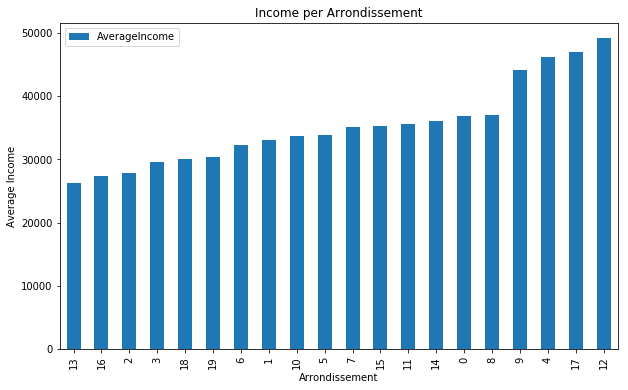

In [76]:
df.sort_values(by=['AverageIncome'], inplace=True)
tobeplotted = df[['Name', 'AverageIncome']]

tobeplotted.plot(kind='bar', figsize=(10,6))
plt.xlabel('Arrondissement')
plt.ylabel('Average Income')
plt.title('Income per Arrondissement')

plt.show()

The best area to have a restaurant would be the 12th arrondissement which is Reuilly.

## Getting Venues of Paries 12 arrondissement

Let's get it's coordinate and try to find some venues around